<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ вакансий из HeadHunter
   

In [133]:
# Загружаем библиотеки
import pandas as pd
import psycopg2


# Юнит 3. Предварительный анализ данных

1. Напишите запрос, который посчитает количество вакансий в нашей базе (вакансии находятся в таблице vacancies). 

In [61]:
# текст запроса
query_3_1 = f'''select count(*)
                from public.vacancies'''




In [62]:
# результат запроса
cnt_vac = pd.read_sql_query(query_3_1, connection)
cnt_vac

C:\Users\Mira\AppData\Local\Temp\ipykernel_89596\3998286573.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  cnt_vac = pd.read_sql_query(query_3_1, connection)


,count
0,49197


2. Напишите запрос, который посчитает количество работодателей (таблица employers). 

In [63]:
# текст запроса
query_3_2 = f'''select count(*)
                from public.employers'''

In [64]:
# результат запроса
cnt_empl = pd.read_sql_query(query_3_2, connection)
cnt_empl

C:\Users\Mira\AppData\Local\Temp\ipykernel_89596\467747242.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  cnt_empl = pd.read_sql_query(query_3_2, connection)


,count
0,23501


3. Посчитате с помощью запроса количество регионов (таблица areas).

In [65]:
# текст запроса
query_3_3 = f'''select count(*)
                from public.areas'''

In [66]:
# результат запроса
cnt_ars = pd.read_sql_query(query_3_3, connection)
cnt_ars

C:\Users\Mira\AppData\Local\Temp\ipykernel_89596\189402584.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  cnt_ars = pd.read_sql_query(query_3_3, connection)


,count
0,1362


4. Посчитате с помощью запроса количество сфер деятельности в базе (таблица industries).

In [67]:
# текст запроса
query_3_4 = f'''select count(*)
                from public.industries'''

In [68]:
# результат запроса
cnt_ind = pd.read_sql_query(query_3_4, connection)
cnt_ind

C:\Users\Mira\AppData\Local\Temp\ipykernel_89596\1648017.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  cnt_ind = pd.read_sql_query(query_3_4, connection)


,count
0,294


***

### выводы по предварительному анализу данных
Количество вакансий 49197, а количество работадателей 23501, что логически объясняется тем, что работодатель может запросить неограниченное количество вакансий в HH. Среди вычисленных чисел наименьшим числом является количество сфер деятельности 294, что естественно объясняется тем, что сферы деятельности работадателей повторяются, и ограничены востребованностью.
Число регионов (1362) в базе зависит от территориальной распространенности Компании HH.

# Юнит 4. Детальный анализ вакансий

1. Напишите запрос, который позволит узнать, сколько (cnt) вакансий в каждом регионе (area).
Отсортируйте по количеству вакансий в порядке убывания.

In [136]:
# текст запроса
query_4_1 = f'''select 
                    a.name area,
                    count(*) cnt
                from 
                    public.vacancies v
                join public.areas a on a.id = v.area_id
                group by a.id
                order by count(*) desc'''

In [137]:
# результат запроса
df = pd.read_sql_query(query_4_1, connection)
df.head(10)

C:\Users\Mira\AppData\Local\Temp\ipykernel_93972\1119554895.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_4_1, connection)


,area,cnt
0,Москва,5333
1,Санкт-Петербург,2851
2,Минск,2112
3,Новосибирск,2006
4,Алматы,1892
5,Екатеринбург,1698
6,Нижний Новгород,1670
7,Казань,1415
8,Краснодар,1301
9,Самара,1144


2. Напишите запрос, чтобы определить у какого количества вакансий заполнено хотя бы одно из двух полей с зарплатой.

In [138]:
# текст запроса
query_4_2 = f'''select
                    v1.salary_from as salary_full
                from
                    public.vacancies v1
                where  (v1.salary_from is not null
                    and v1.salary_to is not null)
                    or (v1.salary_from is not null 
                    and v1.salary_to is null)
                union all
                select
                    v2.salary_to
                from
                    public.vacancies v2
                where   v2.salary_from is null
                    and v2.salary_to is not null'''     

In [140]:
# результат запроса
df = pd.read_sql_query(query_4_2, connection)
df.shape[0]

C:\Users\Mira\AppData\Local\Temp\ipykernel_93972\2185104535.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_4_2, connection)


24073

3. Найдите средние значения для нижней и верхней границы зарплатной вилки. Округлите значения до целого.

In [55]:
# текст запроса
query_4_3 = f'''select
                    round(avg(salary_from)) avg_from,
                    round(avg(salary_to)) avg_to
                from
                    public.vacancies'''

In [56]:
# результат запроса 
df = pd.read_sql_query(query_4_3, connection)
df

C:\Users\Mira\AppData\Local\Temp\ipykernel_89596\2248342382.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_4_3, connection)


,avg_from,avg_to
0,71065.0,110537.0


4. Напишите запрос, который выведет количество вакансий для каждого сочетания типа рабочего графика (schedule) и типа трудоустройства (employment), используемого в вакансиях. Результат отсортируйте по убыванию количества.


In [57]:
# текст запроса
query_4_4 = f'''select
                    schedule,
                    employment,
                    count(*)
                from
                    public.vacancies
                group by schedule, employment
                order by count(*) desc'''

In [58]:
# результат запроса
df = pd.read_sql_query(query_4_4, connection)
df.head(5)

C:\Users\Mira\AppData\Local\Temp\ipykernel_89596\58668178.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_4_4, connection)


,schedule,employment,count
0,Полный день,Полная занятость,35367
1,Удаленная работа,Полная занятость,7802
2,Гибкий график,Полная занятость,1593
3,Удаленная работа,Частичная занятость,1312
4,Сменный график,Полная занятость,940


5. Напишите запрос, выводящий значения поля Требуемый опыт работы (experience) в порядке возрастания количества вакансий, в которых указан данный вариант опыта. 

In [59]:
# текст запроса
query_4_5 = f'''select
                    experience,
                    count(*)
                from
                    public.vacancies
                group by experience
                order by count(*)'''

In [60]:
# результат запроса
df = pd.read_sql_query(query_4_5, connection)
df

C:\Users\Mira\AppData\Local\Temp\ipykernel_89596\2316260449.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_4_5, connection)


,experience,count
0,Более 6 лет,1337
1,Нет опыта,7197
2,От 3 до 6 лет,14511
3,От 1 года до 3 лет,26152


***

### выводы по детальному анализу вакансий
Наибольшее число вакансий относятся к Российским городам миллионникам и самому большому городу Белорусии - Минск, можно сделать вывод, что число вакансий в регионах коррелирует с численностью населения, то есть чем густо населеннее регион, тем больше вакансий в данных регионах. 

В 49% (24073) вакансий работодатель не указал сумму заработной платы никак, ни нижнюю ни верхнюю границу зарплатной вилки. Думаю такой подход  снижает приоритетность вакансии у соискателя, так как соискателю свойственно предпочитать объявления, где больше ясности и точности. 

В целом в России зароботная плата предлагаемая работодателями в HH варируется в среднем от 71065 до 110537 рублей. Львиную долю (72%)  вакансии составляют вакансии с такими типами рабочего графика и трудоустройства как полный день и полная занятость, а сочетание удаленная работа - полная занятость составляет 16%, остальные сочетания типов графика и трудоустройства составляют незначительные доли. 

В вакансиях HH наиболее часто (53%) требуемым опытом работы является опыт работы от 1 года до 3 лет, есть вакансии (30%), где требуется опыт работы от 3 до 6 лет, без опыта работы (15%) и более 6 лет (2%).

# Юнит 5. Анализ работодателей

1. Напишите запрос, который позволит узнать, какие работодатели находятся на первом и пятом месте по количеству вакансий.

In [27]:
# текст запроса
query_5_1 = f'''select
                    e.name,
                    count(*)
                from
                    public.vacancies v
                join public.employers e on e.id = v.employer_id 
                group by e.name
                order by count(*) desc'''

In [39]:
# результат запроса
df = pd.read_sql_query(query_5_1, connection)
df

C:\Users\Mira\AppData\Local\Temp\ipykernel_92816\3834399874.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_5_1, connection)


,name,count
0,Яндекс,1933
1,Ростелеком,491
2,Тинькофф,444
3,СБЕР,428
4,Газпром нефть,331
...,...,...
14761,им. Тьюринга,1
14762,LLC Novalab Tech,1
14763,Компания Мир упаковки,1
14764,Лифинцев Олег Иванович,1


2. Напишите запрос, который для каждого региона выведет количество работодателей и вакансий в нём.
Среди регионов, в которых нет вакансий, найдите тот, в котором наибольшее количество работодателей.


In [47]:
# текст запроса
query_5_2 = f'''select
                    a.name area,
                    count(distinct(e.id)) cnt_employers,
                    count(v.id) cnt_vacancies
                from 
                    public.areas a
                left join public.employers e on a.id = e.area
                left join public.vacancies v on a.id = v.area_id
                where v.id is null
                group by a.id
                order by count(distinct(e.id)) desc
                '''               
                    

In [48]:
# результат запроса
df = pd.read_sql_query(query_5_2, connection)
df

C:\Users\Mira\AppData\Local\Temp\ipykernel_92816\2250345976.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_5_2, connection)


,area,cnt_employers,cnt_vacancies
0,Россия,410,0
1,Казахстан,207,0
2,Московская область,75,0
3,Краснодарский край,19,0
4,Ростовская область,18,0
...,...,...,...
588,Скидель,0,0
589,Белоозерск,0,0
590,Орловский,0,0
591,Павловская,0,0


3. Для каждого работодателя посчитайте количество регионов, в которых он публикует свои вакансии. Отсортируйте результат по убыванию количества.


In [57]:
# текст запроса
query_5_3 = f'''WITH Regions_Of_Employers AS
                    (select
                    v.employer_id,
                    count(distinct(v.area_id)) cnt_area
                    from public.vacancies v
                    group by v.employer_id
                    order by count(v.area_id) desc)
                SELECT 
                    e.name employer,
                    roe.cnt_area cnt_regions
                FROM Regions_Of_Employers as roe
                JOIN public.employers e ON e.id = roe.employer_id'''
                    

In [58]:
# результат запроса
df = pd.read_sql_query(query_5_3, connection)
df.head(5)

C:\Users\Mira\AppData\Local\Temp\ipykernel_92816\1972999362.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_5_3, connection)


,employer,cnt_regions
0,Яндекс,181
1,Ростелеком,152
2,Тинькофф,43
3,СБЕР,24
4,Газпром нефть,24


4. Напишите запрос для подсчёта количества работодателей, у которых не указана сфера деятельности. 

In [43]:
# текст запроса
query_5_4 = f'''select count(*) cnt
                    from employers e
                    left join employers_industries ei on e.id = ei.employer_id
                    where ei.industry_id is null
                    '''
                    

In [44]:
# результат запроса
df = pd.read_sql_query(query_5_4, connection)
df

C:\Users\Mira\AppData\Local\Temp\ipykernel_89596\3493105328.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_5_4, connection)


,cnt
0,8419


5. Напишите запрос, чтобы узнать название компании, находящейся на третьем месте в алфавитном списке (по названию) компаний, у которых указано четыре сферы деятельности. 

In [71]:
# текст запроса
query_5_5 = f'''select
                    e.name name_employers,
                    count(ei.industry_id) cnt_industry
                from public.employers_industries ei
                join public.employers e on ei.employer_id = e.id
                group by e.name
                having count(ei.industry_id) = 4
                order by e.name'''                 

In [72]:
# результат запроса
df = pd.read_sql_query(query_5_5, connection)
df	

C:\Users\Mira\AppData\Local\Temp\ipykernel_92816\1673150718.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_5_5, connection)


,name_employers,cnt_industry
0,101 Интернет,4
1,21vek.by,4
2,2ГИС,4
3,2К,4
4,4 пикселя +,4
...,...,...
1131,ЮРИОН,4
1132,ЮТИП Технологии,4
1133,ЯКласс,4
1134,ЯрНео,4


6. С помощью запроса выясните, у какого количества работодателей в качестве сферы деятельности указана Разработка программного обеспечения.


In [39]:
# текст запроса
query_5_6 = f'''select
                    count(distinct(ei.employer_id)) cnt_empl
                from 
                    public.employers_industries ei
                join public.industries i on ei.industry_id = i.id
                where i.name = 'Разработка программного обеспечения'
                '''

In [40]:
# результат запроса
df = pd.read_sql_query(query_5_6, connection)
df 

C:\Users\Mira\AppData\Local\Temp\ipykernel_89596\3088500550.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_5_6, connection)


,cnt_empl
0,3553


7. Для компании «Яндекс» выведите список регионов-миллионников, в которых представлены вакансии компании, вместе с количеством вакансий в этих регионах. Также добавьте строку Total с общим количеством вакансий компании. Результат отсортируйте по возрастанию количества.

Список городов-милионников надо взять [отсюда](https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D1%80%D0%BE%D0%B4%D0%B0-%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%B5%D1%80%D1%8B_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8). 

Если возникнут трудности с этим заданиеv посмотрите материалы модуля  PYTHON-17. Как получать данные из веб-источников и API. 

In [22]:
# код для получения списка городов-милионников
import urllib.parse as req

path_common = req.urlparse('https://ru.wikipedia.org/wiki/Города-миллионеры_России#Список_городов-миллионеров')
url = path_common.scheme + '://' + req.quote(path_common.netloc) +  req.quote(path_common.path) + '#'+ req.quote(path_common.fragment)
cities = tuple(pd.read_html(url)[1]['Город'])
print(len(cities))
cities



16


('Москва',
 'Санкт-Петербург',
 'Новосибирск',
 'Екатеринбург',
 'Казань',
 'Нижний Новгород',
 'Красноярск',
 'Челябинск',
 'Самара',
 'Уфа',
 'Ростов-на-Дону',
 'Краснодар',
 'Омск',
 'Воронеж',
 'Пермь',
 'Волгоград')

In [ ]:
# текст запроса
query_5_7 = f'''WITH region_vac_Yandex AS 
                    (SELECT 
                        a.name  region_name,
                        COUNT (v.id) cnt_vac
                    FROM
                        public.vacancies v
                    JOIN public.areas a ON a.id = v.area_id
                    JOIN public.employers e ON e.id = v.employer_id
                    WHERE e.name = 'Яндекс' and a.name in {cities}
                    GROUP BY a.name
                    ORDER BY COUNT (v.id))
                SELECT *
                FROM region_vac_Yandex 
                UNION
                SELECT
                    'Total'::text, 
                    SUM(rvy.cnt_vac)
                FROM region_vac_Yandex AS rvy
                ORDER BY cnt_vac'''
                    

In [37]:
# результат запроса
df = pd.read_sql_query(query_5_7, connection)
df

C:\Users\Mira\AppData\Local\Temp\ipykernel_89596\1965596796.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_5_7, connection)


,region_name,cnt_vac
0,Омск,21.0
1,Челябинск,22.0
2,Красноярск,23.0
3,Волгоград,24.0
4,Пермь,25.0
5,Казань,25.0
6,Ростов-на-Дону,25.0
7,Уфа,26.0
8,Самара,26.0
9,Краснодар,30.0


***

Выводы по анализу работодателей:

Среди работодателей, представивших свои вакансии на HH лидирует компания Яндекс, число вакансий данной компании составляет 4% от числа вакансий в целом, для сравнения число вакансий остальных компаний не превышает и 1%. Только в городах-миллионниках представлены 485 вакансий данной компании,  к примеру у компании Тинькофф  данное число составляет 285, а у Газпром нефть 245

Наиболее широко распределенными по территории России работодателями являются Яндекс	(181 региона) и Ростелеком (152 региона).

Есть компании, чей спектр отраслей в представленных вакансиях очень широкий, например у Компании "Модуль" вакансии затрагивают 16 отраслей, а у таких компаний как: "Простые решения", "Энергия", "Прайд" больше или равно 10 сфер деятельности. 36% (8419) Работодателей не указали свои сферы деятельности в представленных вакансиях. Наиболее распрастранённая на сегодняшний день сфера деятельности это Разработка программного обеспечения, вакансии в этой сфере составляют 25%  вакансий в целом.

# Юнит 6. Предметный анализ

1. Сколько вакансий имеет отношение к данным?

Считаем, что вакансия имеет отношение к данным, если в её названии содержатся слова 'data' или 'данн'.

*Подсказка: Обратите внимание, что названия вакансий могут быть написаны в любом регистре.* 


In [20]:
# текст запроса
query_6_1 = f'''SELECT 
                    count(*)
                FROM public.vacancies v
                where (lower(v.name) like ('%data%')) or (lower(v.name) like '%данн%')
            ''' 


In [19]:
# результат запроса
df = pd.read_sql_query(query_6_1, connection)
df

C:\Users\Mira\AppData\Local\Temp\ipykernel_93972\366702258.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_6_1, connection)


,count
0,1771


2. Сколько есть подходящих вакансий для начинающего дата-сайентиста? 
Будем считать вакансиями для дата-сайентистов такие, в названии которых есть хотя бы одно из следующих сочетаний:
* 'data scientist'
* 'data science'
* 'исследователь данных'
* 'ML' (здесь не нужно брать вакансии по HTML)
* 'machine learning'
* 'машинн%обучен%'

** В следующих заданиях мы продолжим работать с вакансиями по этому условию.*

Считаем вакансиями для специалистов уровня Junior следующие:
* в названии есть слово 'junior' *или*
* требуемый опыт — Нет опыта *или*
* тип трудоустройства — Стажировка.
 

In [65]:
# текст запроса
query_6_2 = f'''SELECT 
                count(*)
                FROM public.vacancies
                WHERE 
                    (
                    name ilike '%data scientist%' OR
                    name ilike '%data science%' OR
                    name ilike '%исследователь данных%' OR
                    (name like '%ML%' and name not ilike '%html%') OR
                    name ilike '%machine learning%' OR
                    name ilike '%машинн%обучен%'
                    )
                    AND
                    (
                    name ilike '%junior%' OR
                    experience ilike '%нет_опыта%' OR
                    employment ilike '%стажировка%'
                    )
            ''' 

In [76]:
# результат запроса
df = pd.read_sql_query(query_6_2, connection)
df 

C:\Users\Mira\AppData\Local\Temp\ipykernel_93972\3060336679.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_6_2, connection)


,count
0,51


3. Сколько есть вакансий для DS, в которых в качестве ключевого навыка указан SQL или postgres?

** Критерии для отнесения вакансии к DS указаны в предыдущем задании.*

In [82]:
# текст запроса
query_6_3 = f'''WITH vacancies_for_DS AS
                    (SELECT *
                     FROM public.vacancies
                     WHERE 
                        (
                        name ilike '%data scientist%' OR
                        name ilike '%data science%' OR
                        name ilike '%исследователь данных%' OR
                        (name like '%ML%' and name not ilike '%html%') OR
                        name ilike '%machine learning%' OR
                        name ilike '%машинн%обучен%'
                        )) 
                SELECT
                    COUNT(*)
                FROM vacancies_for_DS as vac_DS
                WHERE
                    vac_DS.key_skills ilike '%SQL%' or
                    vac_DS.key_skills like '%postgres%'
            ''' 

In [83]:
# результат запроса
df = pd.read_sql_query(query_6_3, connection)
df

C:\Users\Mira\AppData\Local\Temp\ipykernel_93972\3794299702.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_6_3, connection)


,count
0,201


4. Проверьте, насколько популярен Python в требованиях работодателей к DS. Для этого вычислите количество вакансий, в которых в качестве ключевого навыка указан Python.

** Это можно сделать с помощью запроса, аналогичного предыдущему.*

In [87]:
# текст запроса
query_6_4 = f'''WITH vacancies_for_DS AS
                    (SELECT *
                     FROM public.vacancies
                     WHERE 
                        (
                        name ilike '%data scientist%' OR
                        name ilike '%data science%' OR
                        name ilike '%исследователь данных%' OR
                        (name like '%ML%' and name not ilike '%html%') OR
                        name ilike '%machine learning%' OR
                        name ilike '%машинн%обучен%'
                        )) 
                SELECT
                    COUNT(*)
                FROM vacancies_for_DS as vac_DS
                WHERE
                    vac_DS.key_skills ilike '%Python%' 
            ''' 

In [88]:
# результат запроса
# результат запроса
df = pd.read_sql_query(query_6_4, connection)
df

C:\Users\Mira\AppData\Local\Temp\ipykernel_93972\802448285.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_6_4, connection)


,count
0,351


5. Сколько ключевых навыков в среднем указывают в вакансиях для DS?
Ответ округлите до двух знаков после точки-разделителя.

In [98]:
# текст запроса
query_6_5 = f'''WITH vacancies_for_DS AS
                    (SELECT *
                     FROM public.vacancies
                     WHERE 
                        (
                        name ilike '%data scientist%' OR
                        name ilike '%data science%' OR
                        name ilike '%исследователь данных%' OR
                        (name like '%ML%' and name not ilike '%html%') OR
                        name ilike '%machine learning%' OR
                        name ilike '%машинн%обучен%'
                        )) 
                SELECT 
                        ROUND(AVG(LENGTH(vac_DS.key_skills)-LENGTH(replace(vac_DS.key_skills, CHR(9), ''))+1), 2) cnt_skills
                FROM vacancies_for_DS as vac_DS
                WHERE vac_DS.key_skills IS NOT NULL
            '''

In [99]:
# результат запроса
df = pd.read_sql_query(query_6_5, connection)
df

C:\Users\Mira\AppData\Local\Temp\ipykernel_93972\3654210517.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_6_5, connection)


,cnt_skills
0,6.41


6. Напишите запрос, позволяющий вычислить, какую зарплату для DS в **среднем** указывают для каждого типа требуемого опыта (уникальное значение из поля *experience*). 

При решении задачи примите во внимание следующее:
1. Рассматриваем только вакансии, у которых заполнено хотя бы одно из двух полей с зарплатой.
2. Если заполнены оба поля с зарплатой, то считаем зарплату по каждой вакансии как сумму двух полей, делённую на 2. Если заполнено только одно из полей, то его и считаем зарплатой по вакансии.
3. Если в расчётах участвует null, в результате он тоже даст null (посмотрите, что возвращает запрос select 1 + null). Чтобы избежать эту ситуацию, мы воспользуемся функцией [coalesce](https://postgrespro.ru/docs/postgresql/9.5/functions-conditional#functions-coalesce-nvl-ifnull), которая заменит null на значение, которое мы передадим. Например, посмотрите, что возвращает запрос `select 1 + coalesce(null, 0)`

Выясните, на какую зарплату в среднем может рассчитывать дата-сайентист с опытом работы от 3 до 6 лет. Результат округлите до целого числа. 

In [128]:
# текст запроса
query_6_6 = f'''WITH AVG_SALARY_DS AS
                    (WITH vacancies_for_DS AS
                        (SELECT *
                        FROM public.vacancies
                        WHERE 
                            (
                            name ilike '%data scientist%' OR
                            name ilike '%data science%' OR
                            name ilike '%исследователь данных%' OR
                            (name like '%ML%' and name not ilike '%html%') OR
                            name ilike '%machine learning%' OR
                            name ilike '%машинн%обучен%'
                            )) 
                    SELECT
                        vac_DS.experience as experience,
                        (vac_DS.salary_from + vac_DS.salary_to)/2 as avg_salary
                        
                    FROM
                        vacancies_for_DS vac_DS
                    WHERE
                        vac_DS.salary_from is not null AND
                        vac_DS.salary_to is not null    
                    UNION ALL
                    SELECT
                        v_DS.experience,
                        coalesce(v_DS.salary_from, 0) + coalesce(v_DS.salary_to, 0)
                    FROM 
                        vacancies_for_DS as v_DS
                    WHERE
                        (v_DS.salary_from is not null AND
                        v_DS.salary_to is null) OR
                        (v_DS.salary_from is null AND
                        v_DS.salary_to is not null)) 
                SELECT 
                    DS.experience,
                    ROUND(AVG(DS.avg_salary))
                FROM 
                    AVG_SALARY_DS as DS
                GROUP BY DS.experience
            '''
                    

In [129]:
# результат запроса
df = pd.read_sql_query(query_6_6, connection)
df

C:\Users\Mira\AppData\Local\Temp\ipykernel_93972\519194770.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_6_6, connection)


,experience,round
0,От 3 до 6 лет,243115.0
1,От 1 года до 3 лет,139675.0
2,Нет опыта,74643.0


***

Выводы по предметному анализу.

Среди представленных вакансий в HH, вакансии касательно данных составляют 3,6% (1771 шт.), 27% (480 шт.) из них - вакансии для Дата сайентистов, а 10,6% (51 шт.) из них для джуниор Дата сайентистов. 

В 42%-х случаев объявления вакансий для дата сайентистов, требуется знание SQL или postgres, а знание Python требуется в 72%. 

К дата сайентистам требования по ключевым навыкам чуть выше чем у остальных профессий, если для дата сайентистов в вакансиях  в среднем указывают около 6,41% ключевых навыков, то  ко всем остальным вакансиям, вместе взятых, данное число составляет 6,37%.

Рост зароботной платы в зависимости от опыта работы в представленном срезе составляет 74% - 87%, то есть предлагаемая зароботная плата джуниор дата сайентиста после 1-3 года опыта может вырасти в среднем на 87%, а после 3 - 6 лет опыта ещё на 74% - 75%.

# Общий вывод по проекту

Подведем итог исследования, обобщите выводы.

- Представленная база вакансий  содержит самое большое количество предложений для системных администраторов -1761 и программистов 1С -1513. 
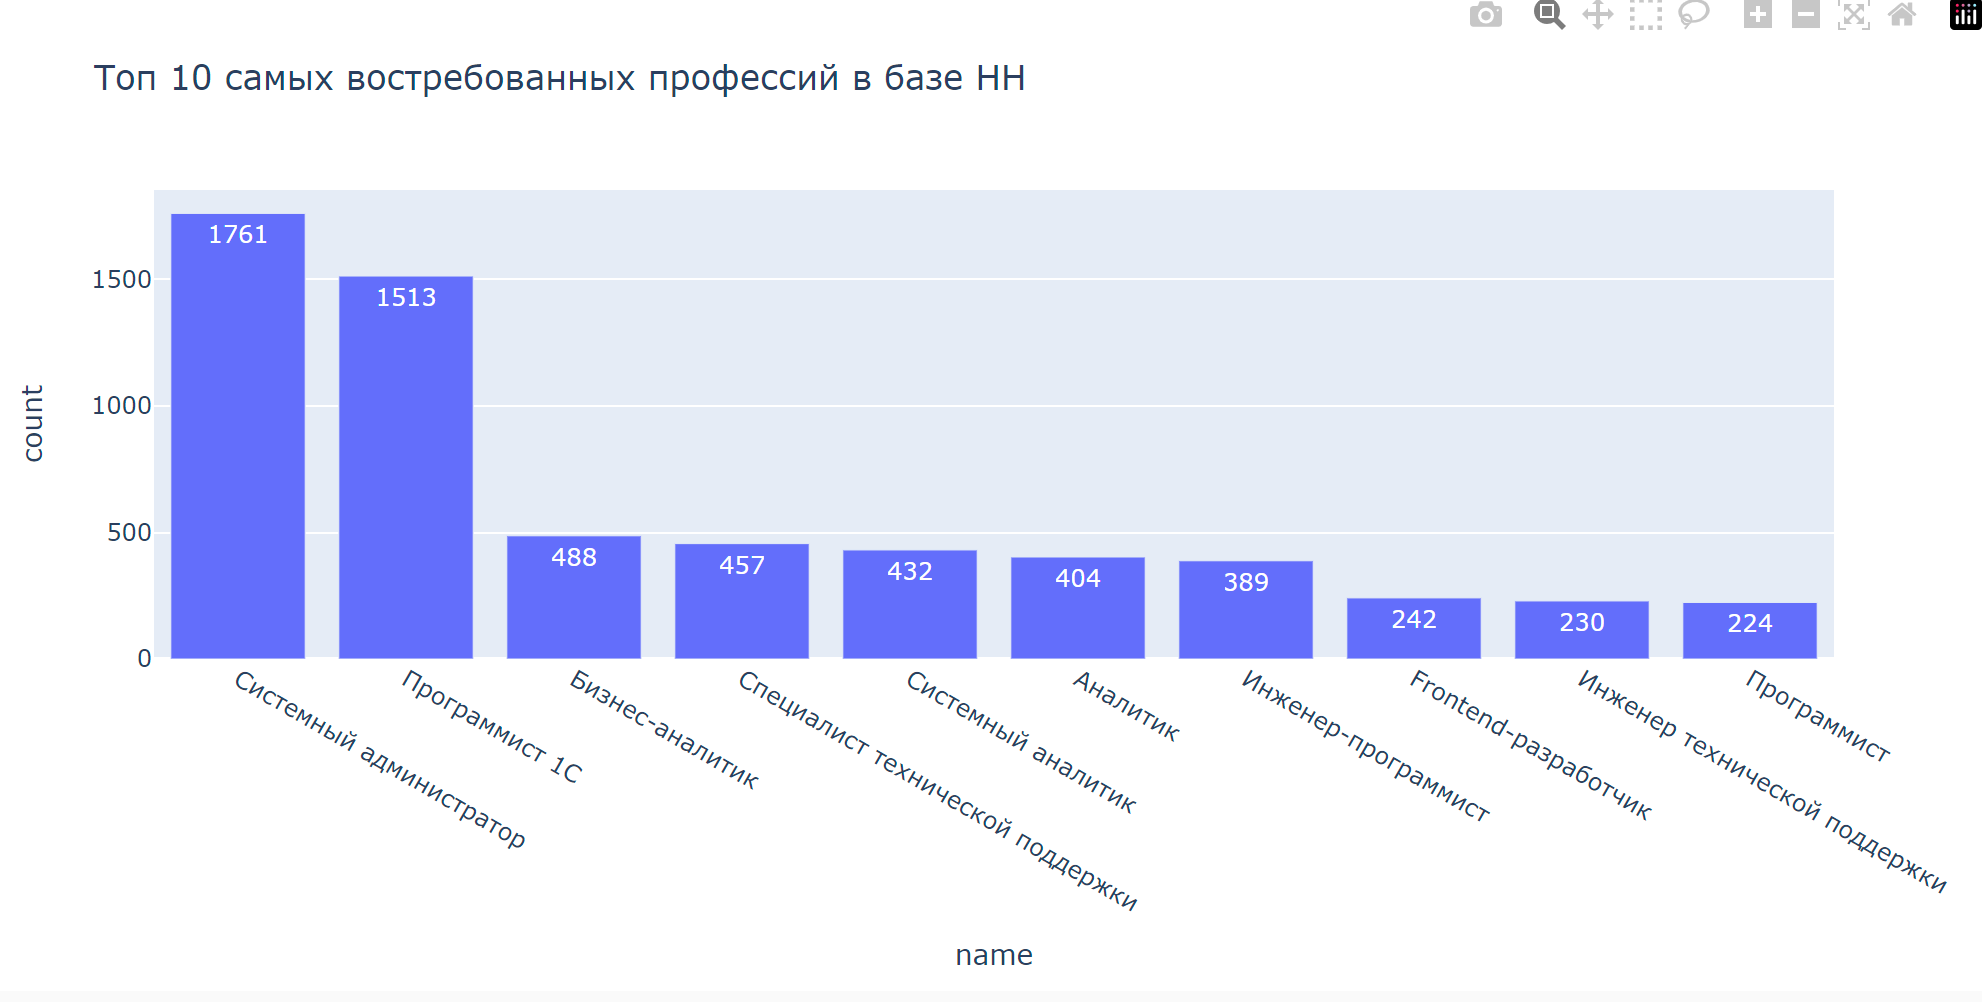

 На сегодняшний день многие предприятия, компании и даже гос. организации стремятся автоматизировать, упрощать и оптимизировать свои процессы и подстраиваются под современные реалии, кто раньше не имел IT-отдела (например розница, общепит), создают свои технологичные продукты и инфраструктуру, которая требует обслуживания. При этом инфраструктура, которую нужно поддерживать, становится больше. Это делает системного администратора востребованной профессией. 

Вести учёт для того, чтобы успешно работать и планировать свою стратегию развития. Учёт доходов и расходов, количества проданной продукции, остатков в запасе, расчёт заработной платы сотрудникам, расчёт налогов и взносов. Если раньше вели такой учёт письменно на бумаге или в заметках, или даже в таблицах Excel, сегодня большинство передовых компаний использует системы автоматизированного учёта. Такие системы значительно упрощают множество процессов, экономят время и снижают риски возникновения ошибок в расчётах. Самой популярной системой автоматизированного учёта является система программных продуктов 1С. Более 80% компаний в России работают в 1С. Для администрирования, сопровождения и внедрения программ 1С в таких организациях, нужен программист 1С. Помимо прочего программист 1С дорабатывает 1С под потребности заказчика, может ввести новые отчёты, создавать новые продукты, на основе существующих. Эти современные тенденции и навыки и умения специалиста делают программиста 1С востребованными насегодняшний день.

Думаю ближайшие 5-10 лет эти профессии будут востребованными, пока  вышеописанные процессы и задачи не будут доверены ИИ.

- Львинная доля вакансий относятся к Российским городам миллионникам и самому большому городу Белорусии - Минск. 

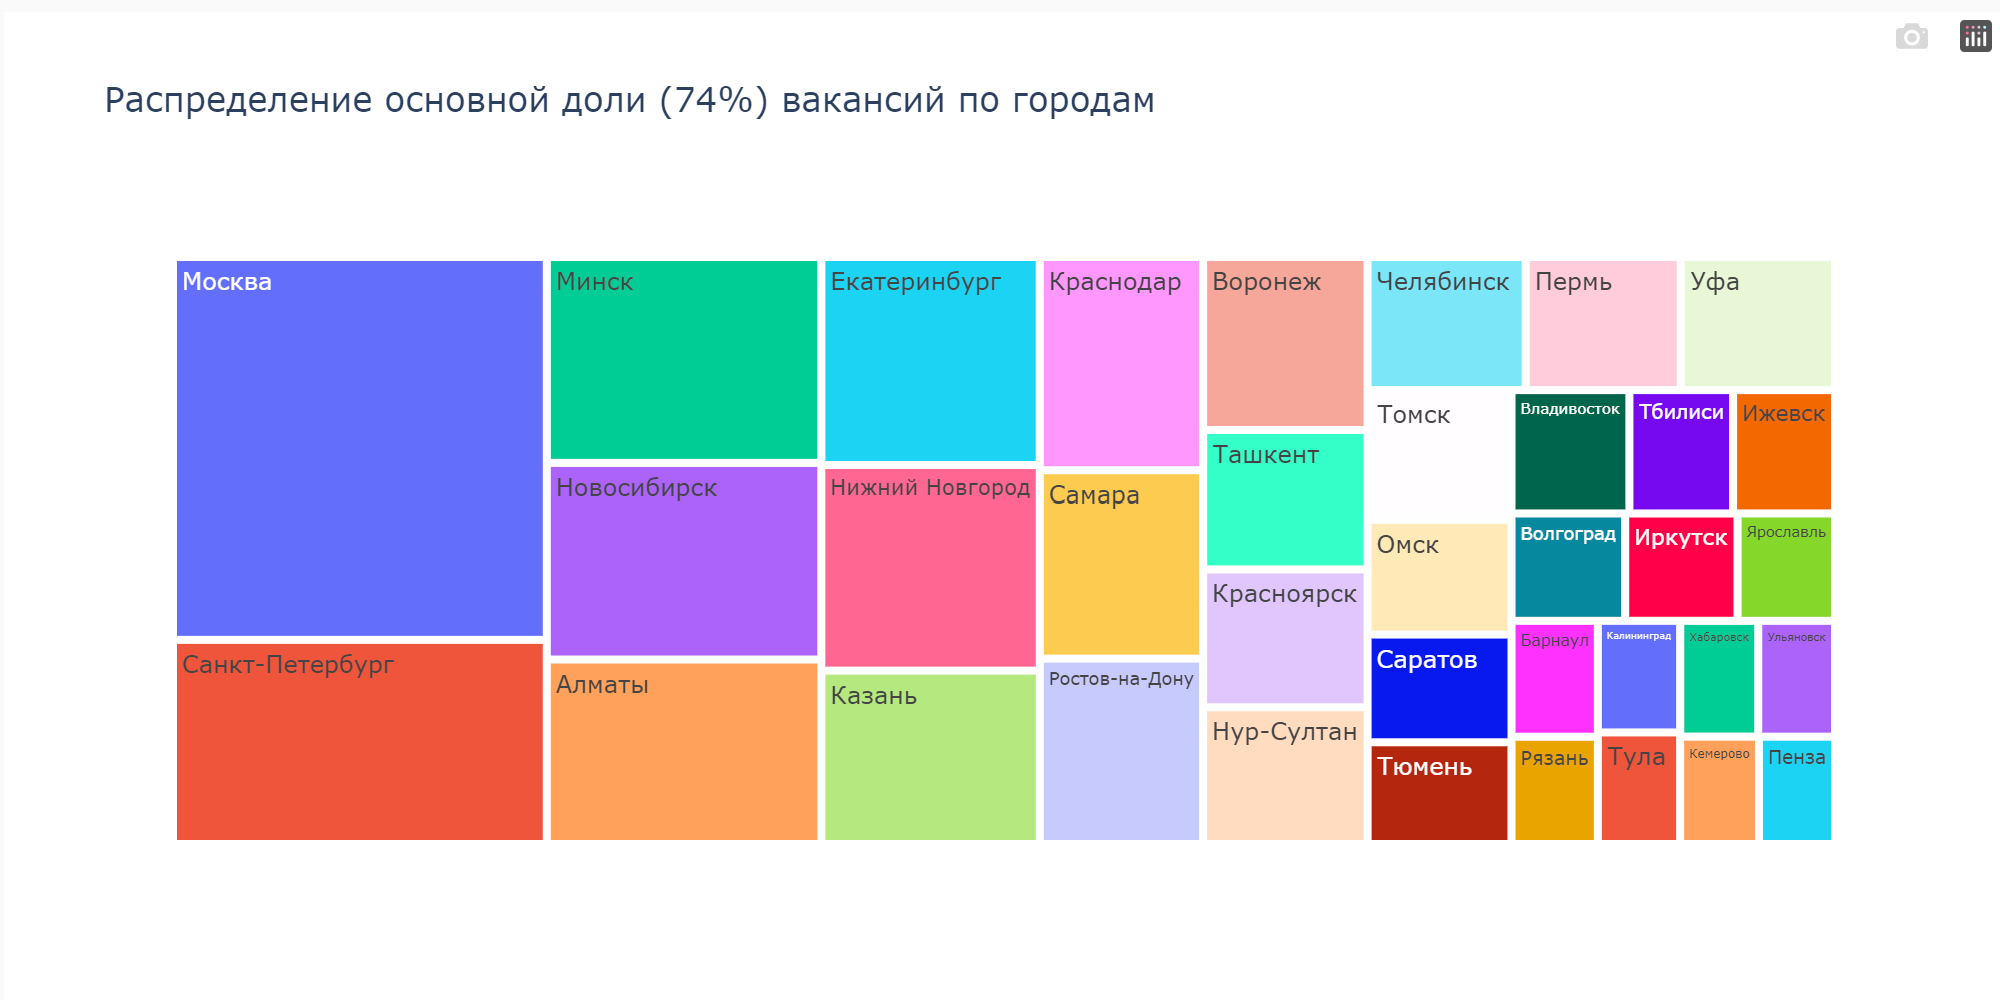

Можно сделать вывод, что число вакансий в регионах коррелирует с численностью населения, то есть чем густо населеннее регион, ну и конечно помимо численности населения, есть такие факторы как: количество производственных предприятий, объём трудовых ресурсов на данной территории а также много других факторов.

- Если помотреть среднюю зарплату в разрезе типа трудоустройства, можно увидеть, что наибольшая сумма предлагается на проектную работу. 

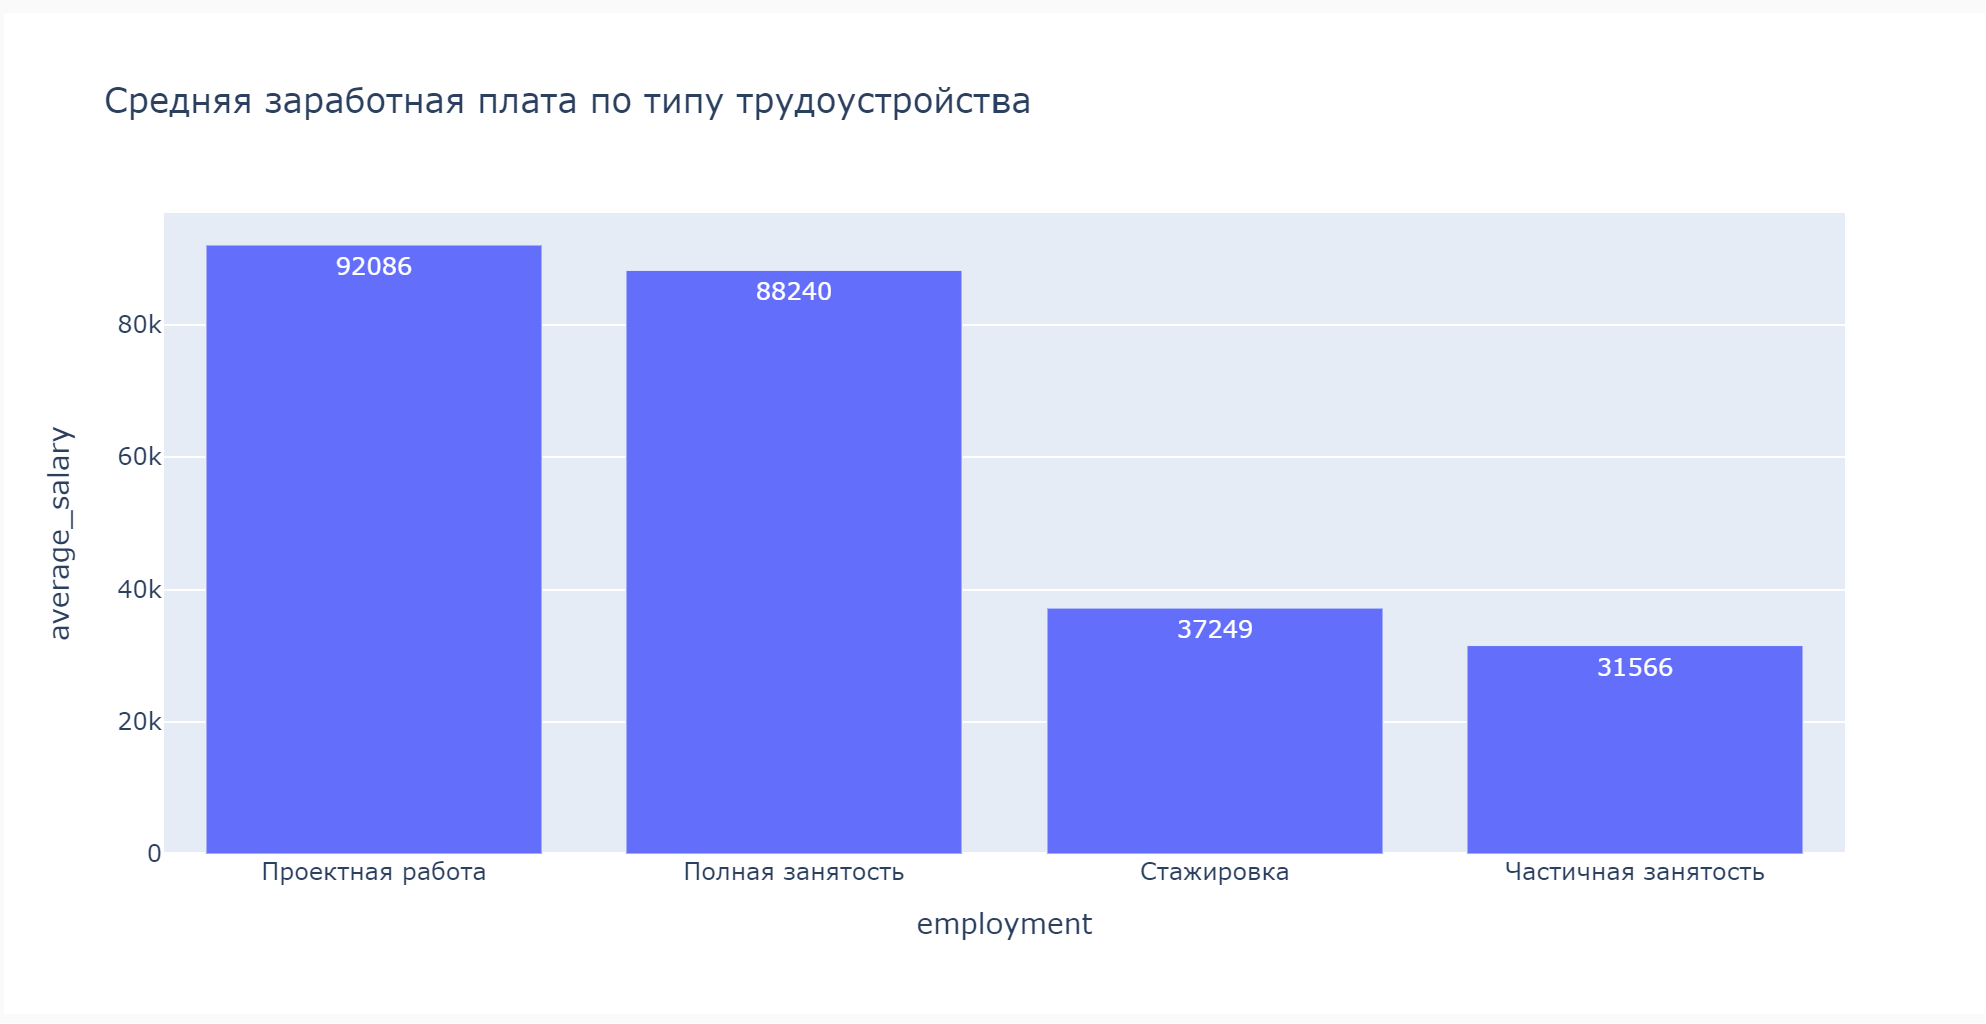

Проектные работы интересны тем, что позволяют получать практический опыт, формировать портфолио, развивать профессиональные навыки, навыки коммуникации, организации, работы в команде. К тому же это временная деятельность, направленная на создание уникального результата в ограниченные сроки.
Также радует, что средняя зарплата для проектных работ наибольшая предлагается с типом графика Гибкий график.

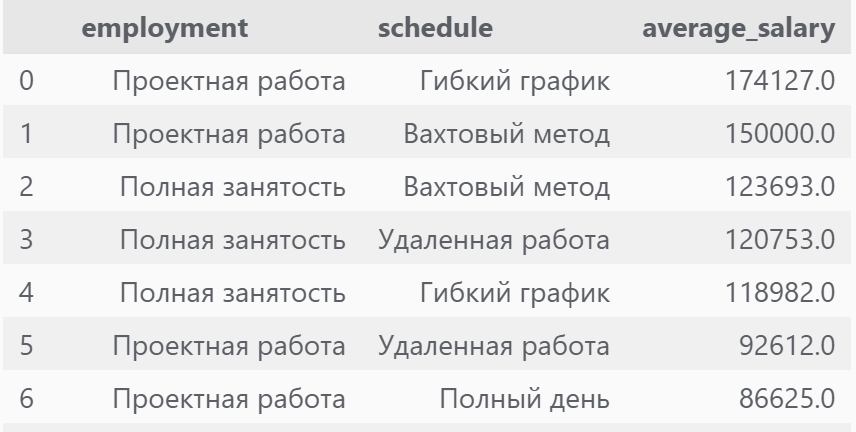